# Building a Marvel Movie Box Office Predictor


## 1. Collect the Data

In [1]:
import pandas as pd
import numpy as np
db = pd.read_csv("mcu_box_office.csv")
db.head()

,movie_title,mcu_phase,release_date,tomato_meter,audience_score,movie_duration,production_budget,opening_weekend,domestic_box_office,worldwide_box_office
0,Iron Man,1,5/2/2008,94,91,126,"186,000,000","102,118,668","318,604,126","585,171,547"
1,The Incredible Hulk,1,6/13/2008,67,70,112,"137,500,000","55,414,050","134,806,913","265,573,859"
2,Iron Man 2,1,5/7/2010,72,71,124,"170,000,000","128,122,480","312,433,331","621,156,389"
3,Thor,1,5/6/2011,77,76,113,"150,000,000","65,723,338","181,030,624","449,326,618"
4,Captain America: The First Avenger,1,7/22/2011,79,75,124,"140,000,000","65,058,524","176,654,505","370,569,776"


In [2]:
for col in ['production_budget','opening_weekend', 'domestic_box_office','worldwide_box_office']: 
    db[col] = db[col].str.replace(',','')
    db[col] = db[col].astype(int)

In [3]:
tlt = ['Thor: Love and Thunder', 4, '7/8/2022', 65, 77, 125, 250000000, 144165107, 336570158, 746670158]
mom = ['Doctor Strange in the Multiverse of Madness', 4, '5/6/2022', 74, 85, 126, 200000000, 187420998, 411331607, 955009776]
tlt = pd.DataFrame(tlt).T
tlt.columns = db.columns
mom = pd.DataFrame(mom).T
mom.columns = db.columns

In [4]:
db = pd.concat([db,tlt,mom])
db.reset_index(inplace = True)
db.drop(columns=['index'], inplace=True)
db.head()

,movie_title,mcu_phase,release_date,tomato_meter,audience_score,movie_duration,production_budget,opening_weekend,domestic_box_office,worldwide_box_office
0,Iron Man,1,5/2/2008,94,91,126,186000000,102118668,318604126,585171547
1,The Incredible Hulk,1,6/13/2008,67,70,112,137500000,55414050,134806913,265573859
2,Iron Man 2,1,5/7/2010,72,71,124,170000000,128122480,312433331,621156389
3,Thor,1,5/6/2011,77,76,113,150000000,65723338,181030624,449326618
4,Captain America: The First Avenger,1,7/22/2011,79,75,124,140000000,65058524,176654505,370569776


In [5]:
num_in_series = {
    'Iron Man':1,
    'The Incredible Hulk':1,
    'Iron Man 2':2, 
    'Thor':1,
    'Captain America: The First Avenger':1,
    'The Avengers':1,
    'Iron Man 3':3,
    'Thor: The Dark World':2, 
    'Captain America: The Winter Soldier':2,
    'Guardians of the Galaxy':1,
    'Avengers: Age of Ultron':2, 
    'Ant-Man':1,
    'Captain America: Civil War':3,
    'Doctor Strange':1,
    'Guardians of the Galaxy Vol. 2':2, 
    'Spider-Man: Homecoming':1,
    'Thor: Ragnarok':3, 
    'Black Panther':1, 
    'Avengers: Infinity War':3,
    'Ant-Man and the Wasp':2, 
    'Captain Marvel':1, 
    'Avengers: End Game':4,
    'Spider-Man: Far From Home':2,
    'Black Widow':1,
    'Shang-Chi and the Legend of the Ten Rings':1,
    'Eternals':1,
    'Spider-Man: No Way Home':3,
    'Thor: Love and Thunder':4,
    'Doctor Strange in the Multiverse of Madness':2
}

In [6]:
character_appearance_dict = {
    'Iron Man': ['Iron Man','Iron Man 2','The Avengers','Iron Man 3','Avengers: Age of Ultron','Captain America: Civil War', 'Avengers: Infinity War', 'Avengers: End Game'],
    'Hulk':['The Incredible Hulk','The Avengers',  'Avengers: Age of Ultron', 'Thor: Ragnarok', 'Avengers: Infinity War','Avengers: End Game'],
    'Captain America':['Captain America: The First Avenger','The Avengers','Captain America: The Winter Soldier','Avengers: Age of Ultron','Captain America: Civil War','Avengers: Infinity War','Avengers: End Game'],
    'Thor': ['Thor', 'The Avengers','Thor: The Dark World','Avengers: Age of Ultron','Thor: Ragnarok','Avengers: Infinity War', 'Avengers: End Game','Thor: Love and Thunder'],
    'Black Widow':['The Avengers','Avengers: Age of Ultron','Avengers: Infinity War','Avengers: End Game','Black Widow'],
    'Hawkeye': ['The Avengers', 'Avengers: Age of Ultron','Avengers: Infinity War', 'Avengers: End Game'],
    'Black Panther':['Black Panther'],
    'Ant Man': ['Ant-Man','Ant-Man and the Wasp'],
    'Spider Man':['Spider-Man: Homecoming','Spider-Man: Far From Home','Spider-Man: No Way Home'],
    'Doctor Strange': ['Doctor Strange','Avengers: Infinity War','Avengers: End Game','Doctor Strange in the Multiverse of Madness'],
    'GotG':['Guardians of the Galaxy','Guardians of the Galaxy Vol. 2','Avengers: Infinity War', 'Avengers: End Game', 'Thor: Love and Thunder'],
}

## 2. Clean the Data

In [7]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, Normalizer

In [8]:
for k,v in character_appearance_dict.items():
    db[k] = db.movie_title.apply(lambda x: True if x in v else False)

In [9]:
db.tail()

,movie_title,mcu_phase,release_date,tomato_meter,audience_score,movie_duration,production_budget,opening_weekend,domestic_box_office,worldwide_box_office,...,Hulk,Captain America,Thor,Black Widow,Hawkeye,Black Panther,Ant Man,Spider Man,Doctor Strange,GotG
24,Shang-Chi and the Legend of the Ten Rings,4,9/3/2021,91,98,133,150000000,75388688,224543292,432243292,...,False,False,False,False,False,False,False,False,False,False
25,Eternals,4,11/5/2021,47,78,157,200000000,71297219,164870264,402064929,...,False,False,False,False,False,False,False,False,False,False
26,Spider-Man: No Way Home,4,12/17/2021,93,98,148,200000000,260138569,803975784,1891108035,...,False,False,False,False,False,False,False,True,False,False
27,Thor: Love and Thunder,4,7/8/2022,65,77,125,250000000,144165107,336570158,746670158,...,False,False,True,False,False,False,False,False,False,True
28,Doctor Strange in the Multiverse of Madness,4,5/6/2022,74,85,126,200000000,187420998,411331607,955009776,...,False,False,False,False,False,False,False,False,True,False


In [10]:
db['release_month'] = db.release_date.str.split('/', expand=True)[0]
db['release_year'] = db.release_date.str.split('/', expand=True)[2]

In [11]:
db['release_month'] = db['release_month'].astype(float)
db['release_year'] = db['release_year'].astype(float)
db['movie_duration'] = db['movie_duration'].astype(float)

In [12]:
db = db[['movie_title', 'mcu_phase', 'movie_duration', 'production_budget',
       'opening_weekend', 'domestic_box_office', 'worldwide_box_office',
       'Iron Man', 'Hulk', 'Captain America', 'Thor', 'Black Widow', 'Hawkeye',
       'Black Panther', 'Ant Man', 'Spider Man', 'Doctor Strange', 'GotG',
       'release_month', 'release_year']]

## Adjust for Inflation

In [13]:
import quandl
start='2008-01-01'
end='2022-08-29'

df_cpi = quandl.get(dataset='RATEINF/CPI_USA',start_date=start,end_date=end)
df_cpi.rename(columns={'Value':'cpi'}, inplace=True)
df_cpi.reset_index(inplace=True)
df_cpi['Date'] = df_cpi['Date'].astype(str)
df_cpi['year'] = df_cpi['Date'].str.split('-',expand=True)[0]
df_cpi = df_cpi.groupby('year').mean()
df_cpi.reset_index(inplace=True)
df_cpi['year'] = df_cpi['year'].astype(int)
df_cpi

,year,cpi
0,2008,215.302500
1,2009,214.537000
2,2010,218.055500
3,2011,224.939167
4,2012,229.593917
5,2013,232.957083
6,2014,236.736167
7,2015,237.017000
8,2016,240.011000
9,2017,245.119583


In [14]:
db = db.merge(df_cpi, how='left', left_on='release_year', right_on='year')

In [15]:
db.cpi = db.cpi/289.48

In [16]:
db['production_budget_2022'] = db['production_budget'] / db['cpi']
db['opening_weekend_2022'] = db['opening_weekend'] / db['cpi']

In [17]:
db['num_in_series'] = db.movie_title.map(num_in_series)
db['years_since_ironman'] = db['release_year'] - 2008
db.head()

,movie_title,mcu_phase,movie_duration,production_budget,opening_weekend,domestic_box_office,worldwide_box_office,Iron Man,Hulk,Captain America,...,Doctor Strange,GotG,release_month,release_year,year,cpi,production_budget_2022,opening_weekend_2022,num_in_series,years_since_ironman
0,Iron Man,1,126.0,186000000,102118668,318604126,585171547,True,False,False,...,False,False,5.0,2008.0,2008,0.743756,250082000.905702,137301294.748737,1,0.0
1,The Incredible Hulk,1,112.0,137500000,55414050,134806913,265573859,False,True,False,...,False,False,6.0,2008.0,2008,0.743756,184872446.906097,74505680.119831,1,0.0
2,Iron Man 2,1,124.0,170000000,128122480,312433331,621156389,True,False,False,...,False,False,5.0,2010.0,2010,0.753266,225683828.199701,170089245.675528,2,2.0
3,Thor,1,113.0,150000000,65723338,181030624,449326618,False,False,False,...,False,False,5.0,2011.0,2011,0.777046,193038858.654377,84581054.363172,1,3.0
4,Captain America: The First Avenger,1,124.0,140000000,65058524,176654505,370569776,False,False,True,...,False,False,7.0,2011.0,2011,0.777046,180169601.410752,83725488.124656,1,3.0


In [18]:
db['production_budget_2022'] = db['production_budget_2022'].astype(float)
db['opening_weekend_2022 '] = db['opening_weekend_2022'].astype(float)

## 3. Explore the Data

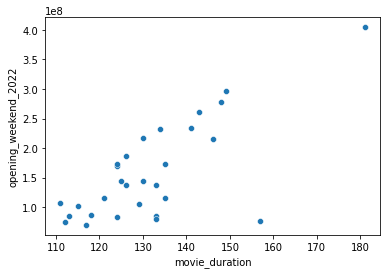

In [19]:
ax = sns.scatterplot(data = db, x = 'movie_duration', y='opening_weekend_2022')

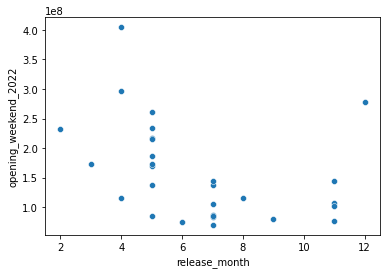

In [20]:
ax = sns.scatterplot(data = db, x = 'release_month', y='opening_weekend_2022')

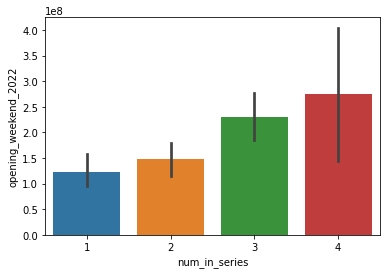

In [21]:
ax = sns.barplot(data = db, x = 'num_in_series', y='opening_weekend_2022')

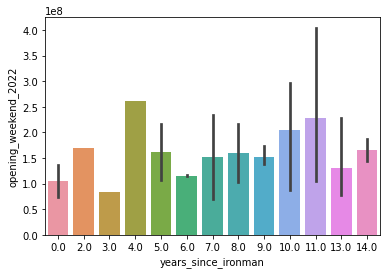

In [22]:
ax = sns.barplot(data = db, x = 'years_since_ironman', y='opening_weekend_2022')

## 3. Prepare the Data

In [23]:
y = db[['opening_weekend_2022']].values.ravel()

In [24]:
X_movie = db[['movie_duration', 'release_month', 'production_budget_2022','num_in_series','years_since_ironman']]
X_char = db[['Iron Man', 'Hulk', 'Captain America', 'Thor', 'Black Widow', 'Hawkeye', 'Black Panther', 'Ant Man', 'Spider Man', 'Doctor Strange']]

X = pd.concat([X_movie, X_char],axis=1)

# Opening Weekend Regression

In [48]:
from sklearn.linear_model import LinearRegression, Ridge, LassoCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
ridge = Ridge()

from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X_movie, y,
                                                    train_size = 0.65,
                                                    random_state = 12) 

X_train.shape, X_test.shape

((18, 5), (11, 5))

In [49]:
model =  ridge.fit(X_train,y_train)

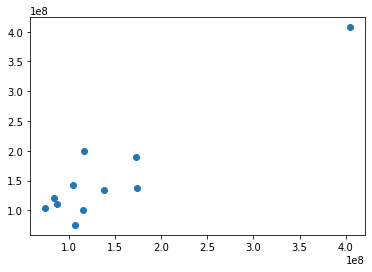

In [50]:
y_pred = model.predict(X_test)
plt.scatter(y_test,y_pred)
plt.show()

In [51]:
model.score(X_test,y_test)

0.8382712627928101

In [52]:
mean_squared_error(y_test, y_pred)

1260642814214626.5

In [53]:
grid = {'normalize': [True,False],
        'alpha': np.arange(0,10,1),
        'fit_intercept':[True,False],
        'max_iter':[1000,2000,3000,4000]}
estimator = Ridge()
gcv = GridSearchCV(estimator=estimator, param_grid=grid)
gcv.fit(X_train, y_train)
gcv.best_estimator_

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler

Ridge(alpha=2, max_iter=1000, normalize=True)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


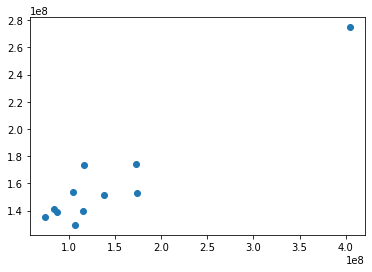

In [55]:
ridge_ = Ridge(alpha=2, max_iter=1000, normalize=True)
model_ =  ridge_.fit(X_train,y_train)
y_pred_ = model_.predict(X_test)
plt.scatter(y_test,y_pred_)
plt.show()

In [56]:
wakanda_forever = [[134, 11, 200000000,2,14]]
model_.predict(wakanda_forever)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


array([1.48866053e+08])

In [57]:
model_.predict([[134, 2, 230563219,1,10]])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


array([1.70560533e+08])

In [58]:
model_.score(X_test,y_test)

0.6050872887845147

### Opening Weekend taking Character into account

In [187]:
ridge = Ridge()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size = 0.75,
                                                    random_state = 42) 

X_train.shape, X_test.shape

((21, 15), (8, 15))

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=1.27859e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


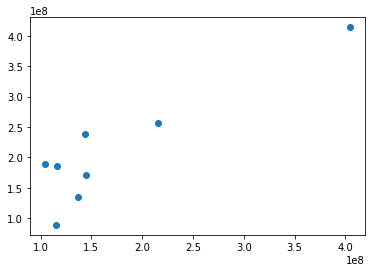

In [188]:
model = ridge.fit(X_train,y_train)
y_pred = model.predict(X_test)
y_pred
plt.scatter(y_test,y_pred)

In [189]:
model.score(X_test,y_test)

0.6548859245406715

In [190]:
model.score(X_train,y_train)

0.8502596958885403

In [191]:
estimator = Ridge()
gcv = GridSearchCV(estimator=estimator, param_grid=grid)
gcv.fit(X_train, y_train)
gcv.best_estimator_

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler

Ridge(normalize=True)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


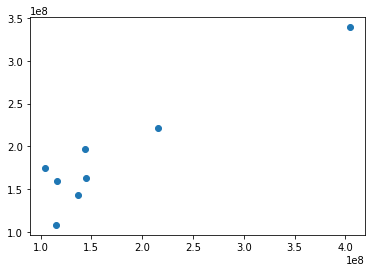

In [192]:
ridge_ = Ridge(normalize=True)
model_ = ridge_.fit(X_train,y_train)
y_pred = model_.predict(X_test)
y_pred
plt.scatter(y_test,y_pred)


In [193]:
model_.score(X_test, y_test)

0.7953831756203851

In [194]:
model_.score(X_train,y_train)

0.7811825801934169

In [195]:
wakanda_forever = [[134, 11, 200000000, 2, 14, False, False, False, False, False, False, True, False, False,False]]
model.predict(wakanda_forever)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


array([1.61626806e+08])

In [196]:
bp = [[134, 2, 230563219,1,10, False, False, False, False, False, False, True, False, False,False]]
model.predict(bp)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


array([1.98378018e+08])

In [45]:
X.columns

Index(['movie_duration', 'release_month', 'production_budget_2022',
       'num_in_series', 'years_since_ironman', 'Iron Man', 'Hulk',
       'Captain America', 'Thor', 'Black Widow', 'Hawkeye', 'Black Panther',
       'Ant Man', 'Spider Man', 'Doctor Strange'],
      dtype='object')

# Bayesian Analysis

In [200]:
import bambi as bmb
import pymc3 as pm
import arviz as az

In [201]:
bayes_data = db[['movie_duration', 'release_month', 'production_budget_2022',
       'num_in_series', 'years_since_ironman', 'Iron Man', 'Hulk',
       'Captain America', 'Thor', 'Black Widow', 'Hawkeye', 'Black Panther',
       'Ant Man', 'Spider Man', 'Doctor Strange', 'opening_weekend_2022']]
bayes_data.columns = ['movie_duration', 'release_month', 'production_budget_2022',
       'num_in_series', 'years_since_ironman', 'Iron_Man', 'Hulk',
       'Captain_America', 'Thor', 'Black_Widow', 'Hawkeye', 'Black_Panther',
       'Ant_Man', 'Spider_Man', 'Doctor_Strange', 'opening_weekend_2022']

In [202]:
bayes_data

,movie_duration,release_month,production_budget_2022,num_in_series,years_since_ironman,Iron_Man,Hulk,Captain_America,Thor,Black_Widow,Hawkeye,Black_Panther,Ant_Man,Spider_Man,Doctor_Strange,opening_weekend_2022
0,126.0,5.0,2.500820e+08,1,0.0,True,False,False,False,False,False,False,False,False,False,137301294.748737
1,112.0,6.0,1.848724e+08,1,0.0,False,True,False,False,False,False,False,False,False,False,74505680.119831
2,124.0,5.0,2.256838e+08,2,2.0,True,False,False,False,False,False,False,False,False,False,170089245.675528
3,113.0,5.0,1.930389e+08,1,3.0,False,False,False,True,False,False,False,False,False,False,84581054.363172
4,124.0,7.0,1.801696e+08,1,3.0,False,False,True,False,False,False,False,False,False,False,83725488.124656
5,143.0,5.0,2.836878e+08,1,4.0,True,True,True,True,True,True,False,False,False,False,261545941.911963
6,130.0,5.0,2.485265e+08,3,5.0,True,False,False,False,False,False,False,False,False,False,216397688.984058
7,111.0,11.0,1.863948e+08,2,5.0,False,False,False,True,False,False,False,False,False,False,106540611.933943
8,135.0,4.0,2.078753e+08,2,6.0,False,False,True,False,False,False,False,False,False,False,116194610.829411
9,121.0,8.0,2.078753e+08,1,6.0,False,False,False,False,False,False,False,False,False,False,115335183.446157


In [203]:
model = bmb.Model("opening_weekend_2022 ~ movie_duration + release_month + production_budget_2022 + years_since_ironman + num_in_series + Iron_Man + Hulk+ Captain_America+Thor+Black_Widow+Hawkeye+Black_Panther+Ant_Man+Spider_Man+Doctor_Strange", bayes_data, categorical=None)
fitted = model.fit(tune=2000, draws=10000, init="auto", random_seed=1234, target_accept=.9)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Intercept, movie_duration, release_month, production_budget_2022, years_since_ironman, num_in_series, Iron_Man, Hulk, Captain_America, Thor, Black_Widow, Hawkeye, Black_Panther, Ant_Man, Spider_Man, Doctor_Strange, opening_weekend_2022_sigma]


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 2_000 tune and 10_000 draw iterations (8_000 + 40_000 draws total) took 456 seconds.
There were 18 divergences after tuning. Increase `target_accept` or reparamet

In [204]:
fitted

Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats
	> observed_data

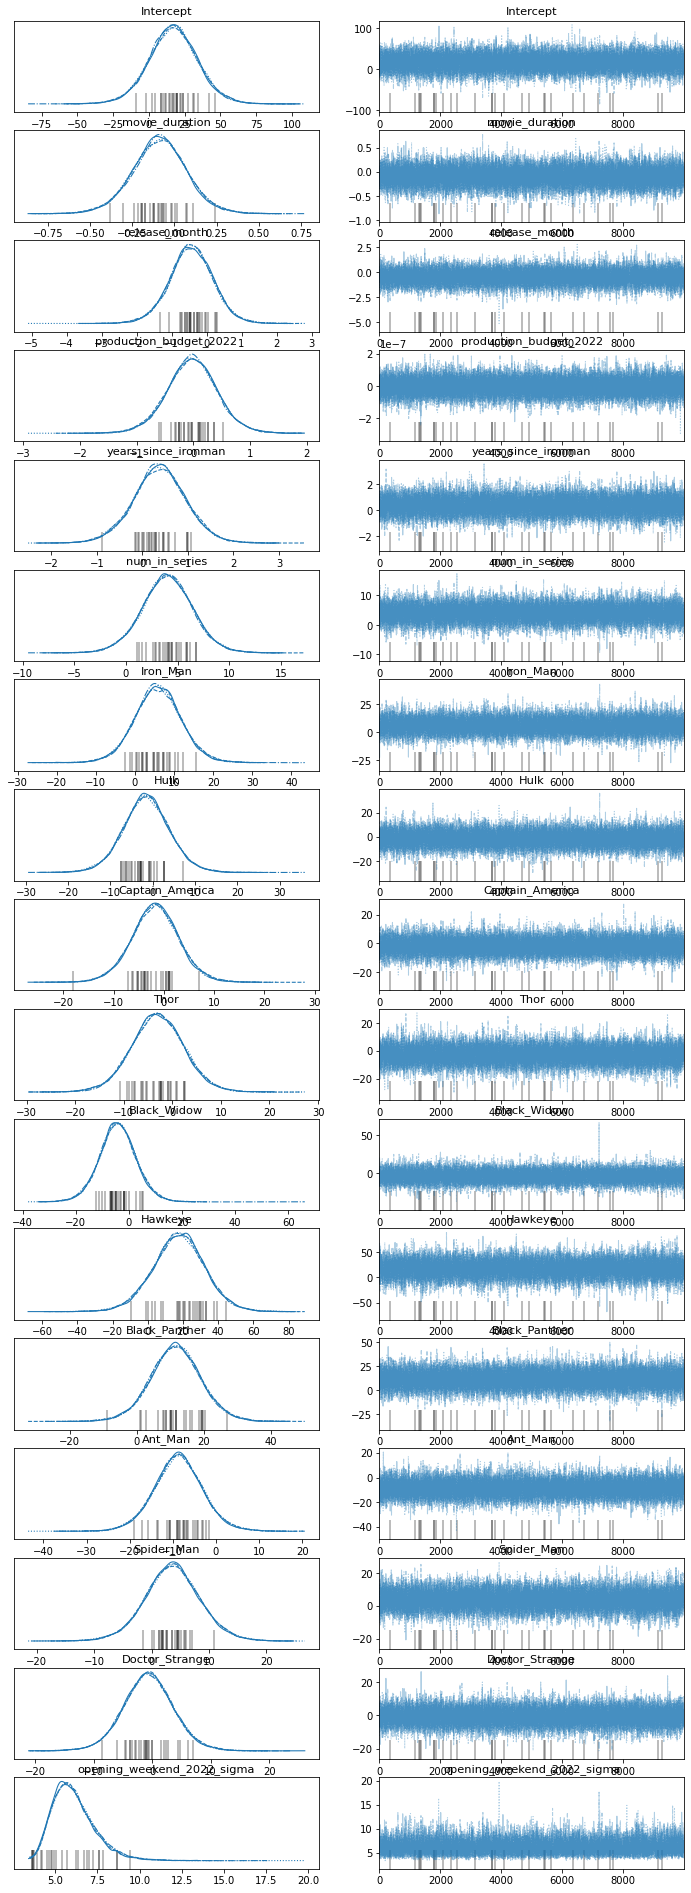

In [205]:
az.plot_trace(fitted)
plt.show()

In [206]:
bayes_values = az.summary(fitted)
bayes_values 

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,16.968,17.243,-15.153,50.044,0.108,0.078,25556.0,27602.0,1.0
movie_duration,-0.089,0.163,-0.395,0.227,0.001,0.001,22751.0,24466.0,1.0
release_month,-0.439,0.630,-1.683,0.708,0.004,0.003,27104.0,25965.0,1.0
production_budget_2022,-0.000,0.000,-0.000,0.000,0.000,0.000,44115.0,31119.0,1.0
years_since_ironman,0.380,0.591,-0.757,1.480,0.005,0.003,16270.0,21518.0,1.0
num_in_series,3.980,2.485,-0.758,8.687,0.020,0.014,15226.0,20952.0,1.0
Iron_Man,5.877,6.037,-5.375,17.467,0.046,0.032,17394.0,21960.0,1.0
Hulk,-1.523,5.599,-12.066,9.231,0.037,0.027,23308.0,25929.0,1.0
Captain_America,-1.729,4.793,-10.903,7.255,0.033,0.024,21401.0,24690.0,1.0
Thor,-3.044,5.499,-13.459,7.209,0.043,0.030,16295.0,22689.0,1.0


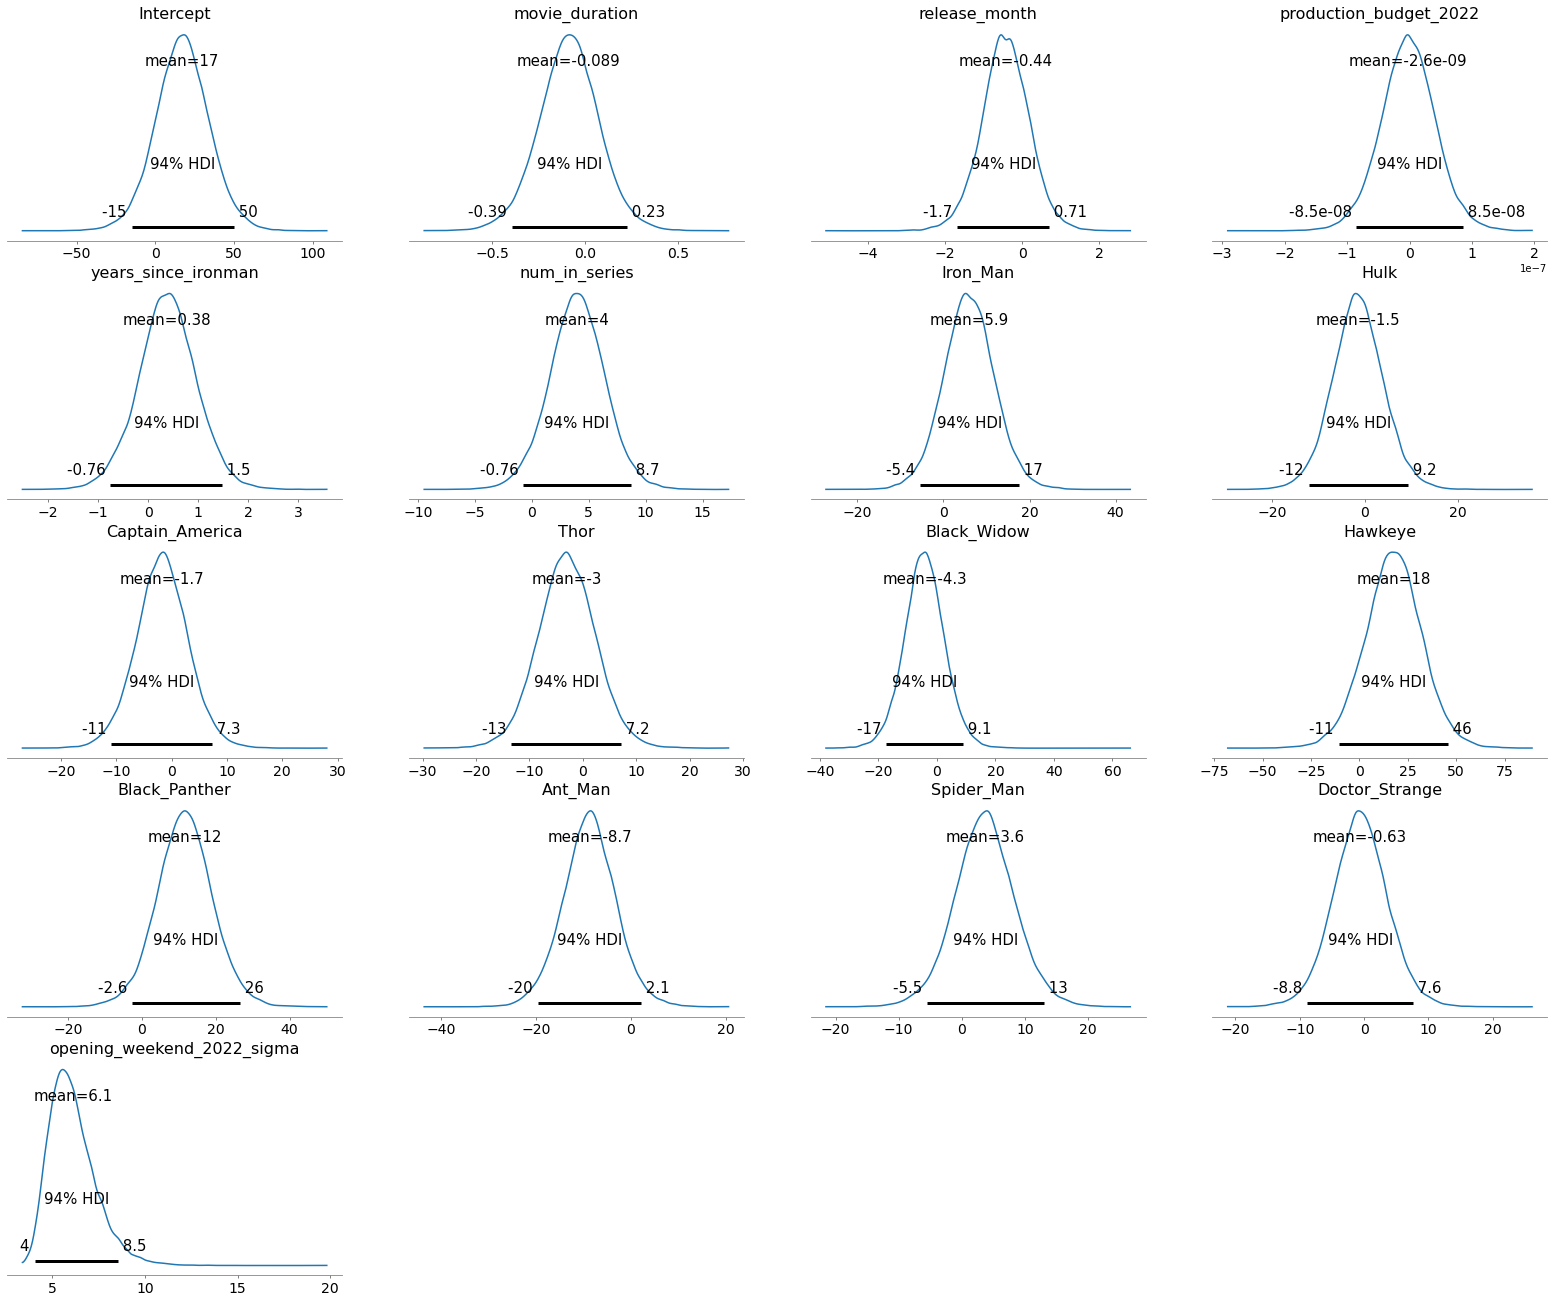

In [207]:
az.plot_posterior(fitted)
plt.show()

In [208]:
bayes_data.iloc[17]

movie_duration                       134.0
release_month                          2.0
production_budget_2022    230563219.771664
num_in_series                            1
years_since_ironman                   10.0
Iron_Man                             False
Hulk                                 False
Captain_America                      False
Thor                                 False
Black_Widow                          False
Hawkeye                              False
Black_Panther                         True
Ant_Man                              False
Spider_Man                           False
Doctor_Strange                       False
opening_weekend_2022      232873406.745787
Name: 17, dtype: object

In [209]:
bp = [134,2,230563219,1,10]

In [56]:
wakanda_forever = [134, 11, 200000000, 2, 14.0, False, False, False, False, False, False, True, False, False, False]

In [214]:
model.predict(fitted)

In [215]:
results = az.summary(fitted)
results 

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,16.968,17.243,-15.153,50.044,0.108,0.078,25556.0,27602.0,1.0
movie_duration,-0.089,0.163,-0.395,0.227,0.001,0.001,22751.0,24466.0,1.0
release_month,-0.439,0.630,-1.683,0.708,0.004,0.003,27104.0,25965.0,1.0
production_budget_2022,-0.000,0.000,-0.000,0.000,0.000,0.000,44115.0,31119.0,1.0
years_since_ironman,0.380,0.591,-0.757,1.480,0.005,0.003,16270.0,21518.0,1.0
num_in_series,3.980,2.485,-0.758,8.687,0.020,0.014,15226.0,20952.0,1.0
Iron_Man,5.877,6.037,-5.375,17.467,0.046,0.032,17394.0,21960.0,1.0
Hulk,-1.523,5.599,-12.066,9.231,0.037,0.027,23308.0,25929.0,1.0
Captain_America,-1.729,4.793,-10.903,7.255,0.033,0.024,21401.0,24690.0,1.0
Thor,-3.044,5.499,-13.459,7.209,0.043,0.030,16295.0,22689.0,1.0


In [216]:
results

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,16.968,17.243,-15.153,50.044,0.108,0.078,25556.0,27602.0,1.0
movie_duration,-0.089,0.163,-0.395,0.227,0.001,0.001,22751.0,24466.0,1.0
release_month,-0.439,0.630,-1.683,0.708,0.004,0.003,27104.0,25965.0,1.0
production_budget_2022,-0.000,0.000,-0.000,0.000,0.000,0.000,44115.0,31119.0,1.0
years_since_ironman,0.380,0.591,-0.757,1.480,0.005,0.003,16270.0,21518.0,1.0
num_in_series,3.980,2.485,-0.758,8.687,0.020,0.014,15226.0,20952.0,1.0
Iron_Man,5.877,6.037,-5.375,17.467,0.046,0.032,17394.0,21960.0,1.0
Hulk,-1.523,5.599,-12.066,9.231,0.037,0.027,23308.0,25929.0,1.0
Captain_America,-1.729,4.793,-10.903,7.255,0.033,0.024,21401.0,24690.0,1.0
Thor,-3.044,5.499,-13.459,7.209,0.043,0.030,16295.0,22689.0,1.0


In [219]:
12.822 ** 6.102

5764294.010327265

In [218]:
for i in range(0,29):
    est = results.loc[f'opening_weekend_2022_mean[{i}]']['mean'] + results.loc['Intercept']['mean']
    mean_sig = results.loc['opening_weekend_2022_sigma']['mean']
    hdi3_sig = results.loc['opening_weekend_2022_sigma']['hdi_3']

    
    print(db.loc[i]['movie_title'])
    print("Actual Opening Weekend in 2022 USD:", round(db.loc[i]['opening_weekend_2022']))
    print("Mean Predicted Opening Weekend:", round(est))
    print("")

Iron Man
Actual Opening Weekend in 2022 USD: 137301295
Mean Predicted Opening Weekend: 5764294

The Incredible Hulk
Actual Opening Weekend in 2022 USD: 74505680
Mean Predicted Opening Weekend: 82492

Iron Man 2
Actual Opening Weekend in 2022 USD: 170089246
Mean Predicted Opening Weekend: 42708022

Thor
Actual Opening Weekend in 2022 USD: 84581054
Mean Predicted Opening Weekend: 78557

Captain America: The First Avenger
Actual Opening Weekend in 2022 USD: 83725488
Mean Predicted Opening Weekend: 47396

The Avengers
Actual Opening Weekend in 2022 USD: 261545942
Mean Predicted Opening Weekend: 80603779

Iron Man 3
Actual Opening Weekend in 2022 USD: 216397689
Mean Predicted Opening Weekend: 170323666

Thor: The Dark World
Actual Opening Weekend in 2022 USD: 106540612
Mean Predicted Opening Weekend: 519797

Captain America: The Winter Soldier
Actual Opening Weekend in 2022 USD: 116194611
Mean Predicted Opening Weekend: 2565555

Guardians of the Galaxy
Actual Opening Weekend in 2022 USD: 11

In [134]:
db.loc[0]

movie_title                       Iron Man
mcu_phase                                1
movie_duration                       126.0
production_budget                186000000
opening_weekend                  102118668
domestic_box_office              318604126
worldwide_box_office             585171547
Iron Man                              True
Hulk                                 False
Captain America                      False
Thor                                 False
Black Widow                          False
Hawkeye                              False
Black Panther                        False
Ant Man                              False
Spider Man                           False
Doctor Strange                       False
GotG                                 False
release_month                          5.0
release_year                        2008.0
year                                  2008
cpi                               0.743756
production_budget_2022    250082000.905702
opening_wee

In [89]:
2900*95

275500

In [ ]:
new_df = bayes_data.copy()
new_df['est_mean'] = bayes_values.loc[['opening_weekend_2022_mean[0]',
       'opening_weekend_2022_mean[1]', 'opening_weekend_2022_mean[2]',
       'opening_weekend_2022_mean[3]', 'opening_weekend_2022_mean[4]',
       'opening_weekend_2022_mean[5]', 'opening_weekend_2022_mean[6]',
       'opening_weekend_2022_mean[7]', 'opening_weekend_2022_mean[8]',
       'opening_weekend_2022_mean[9]', 'opening_weekend_2022_mean[10]',
       'opening_weekend_2022_mean[11]', 'opening_weekend_2022_mean[12]',
       'opening_weekend_2022_mean[13]', 'opening_weekend_2022_mean[14]',
       'opening_weekend_2022_mean[15]', 'opening_weekend_2022_mean[16]',
       'opening_weekend_2022_mean[17]', 'opening_weekend_2022_mean[18]',
       'opening_weekend_2022_mean[19]', 'opening_weekend_2022_mean[20]',
       'opening_weekend_2022_mean[21]', 'opening_weekend_2022_mean[22]',
       'opening_weekend_2022_mean[23]', 'opening_weekend_2022_mean[24]',
       'opening_weekend_2022_mean[25]', 'opening_weekend_2022_mean[26]',
       'opening_weekend_2022_mean[27]', 'opening_weekend_2022_mean[28]']]['mean'].values
new_df

,movie_duration,release_month,production_budget_2022,num_in_series,years_since_ironman,Iron Man,Hulk,Captain America,Thor,Black Widow,Hawkeye,Black Panther,Ant Man,Spider Man,Doctor Strange,opening_weekend_2022,est_mean
0,126.0,5.0,2.500820e+08,1,0.0,True,False,False,False,False,False,False,False,False,False,137301294.748737,12.117
1,112.0,6.0,1.848724e+08,1,0.0,False,True,False,False,False,False,False,False,False,False,74505680.119831,7.752
2,124.0,5.0,2.256838e+08,2,2.0,True,False,False,False,False,False,False,False,False,False,170089245.675528,14.118
3,113.0,5.0,1.930389e+08,1,3.0,False,False,False,True,False,False,False,False,False,False,84581054.363172,9.468
4,124.0,7.0,1.801696e+08,1,3.0,False,False,True,False,False,False,False,False,False,False,83725488.124656,7.827
5,143.0,5.0,2.836878e+08,1,4.0,True,True,True,True,True,True,False,False,False,False,261545941.911963,15.091
6,130.0,5.0,2.485265e+08,3,5.0,True,False,False,False,False,False,False,False,False,False,216397688.984058,18.730
7,111.0,11.0,1.863948e+08,2,5.0,False,False,False,True,False,False,False,False,False,False,106540611.933943,7.255
8,135.0,4.0,2.078753e+08,2,6.0,False,False,True,False,False,False,False,False,False,False,116194610.829411,15.397
9,121.0,8.0,2.078753e+08,1,6.0,False,False,False,False,False,False,False,False,False,False,115335183.446157,8.516


In [ ]:
new_df['estbox'] = new_df['est_mean']**(6.1)

In [ ]:
new_df['estbox'] - new_df['opening_weekend_2022']

0     -133239573.096285
1      -74239347.745587
2     -159770750.080281
3      -83679119.196574
4      -83443044.656049
5     -246051358.062126
6     -158524096.486312
7     -106362829.747795
8      -98681622.041989
9     -114862644.637678
10     127007544.001213
11     -69724651.327732
12     -47116264.394591
13    -102550907.331624
14    -148517084.529715
15    -136607305.479767
16    -139155206.284629
17    -212449868.026246
18      86762218.152905
19     -86002261.839254
20    -166866111.793727
21    2132628061.928936
22    -100485715.021382
23     -83137862.634137
24     -80340286.371914
25     -75372681.963912
26    -269534595.078213
27     -22541051.417019
28    -172206120.829761
dtype: object

In [ ]:
202003951**(1/6.572)

18.35478148182127

In [69]:
18.35 ** (6.572)

201658365.48949984

In [ ]:
bayes_data

,movie_duration,release_month,release_year,production_budget_2022,opening_weekend_2022
0,0.214286,0.3,0.000000,0.143715,137301294.748737
1,0.014286,0.4,0.000000,0.000000,74505680.119831
2,0.185714,0.3,0.142857,0.102745,170089245.675528
3,0.028571,0.3,0.214286,0.056934,84581054.363172
4,0.185714,0.5,0.214286,0.025976,83725488.124656
5,0.457143,0.3,0.285714,0.303535,261545941.911963
6,0.271429,0.3,0.357143,0.233796,216397688.984058
7,0.000000,0.9,0.357143,0.073487,106540611.933943
8,0.342857,0.2,0.428571,0.146452,116194610.829411
9,0.142857,0.6,0.428571,0.146452,115335183.446157
